# Flow Matching

## Data

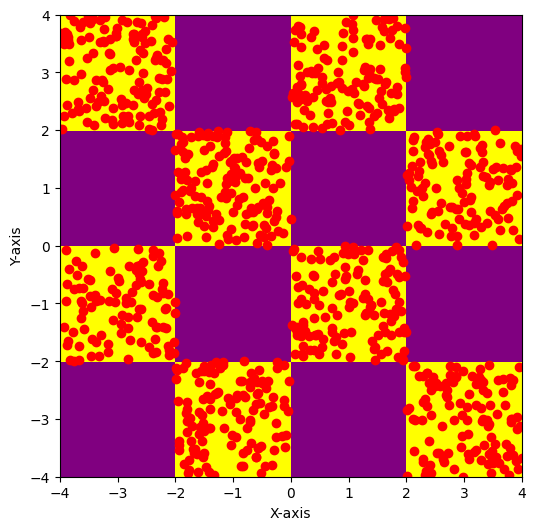

In [5]:
import tqdm
import math
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Parameters
N = 1000  # Number of points to sample
x_min, x_max = -4, 4
y_min, y_max = -4, 4
resolution = 100  # Resolution of the grid

# Create the grid
x = np.linspace(x_min, x_max, resolution)
y = np.linspace(y_min, y_max, resolution)
X, Y = np.meshgrid(x, y)

# Checkerboard pattern
length = 4
checkerboard = np.indices((length, length)).sum(axis=0) % 2

# Sample points in regions where checkerboard pattern is 1
sampled_points = []
while len(sampled_points) < N:
    # Randomly sample a point within the x and y range
    x_sample = np.random.uniform(x_min, x_max)
    y_sample = np.random.uniform(y_min, y_max)
    
    # Determine the closest grid index
    i = int((x_sample - x_min) / (x_max - x_min) * length)
    j = int((y_sample - y_min) / (y_max - y_min) * length)
    
    # Check if the sampled point is in a region where checkerboard == 1
    if checkerboard[j, i] == 1:
        sampled_points.append((x_sample, y_sample))

# Convert to NumPy array for easier plotting
sampled_points = np.array(sampled_points)

# Plot the checkerboard pattern
plt.figure(figsize=(6, 6))
plt.imshow(checkerboard, extent=(x_min, x_max, y_min, y_max), origin="lower", cmap=ListedColormap(["purple", "yellow"]))

# Plot sampled points
plt.scatter(sampled_points[:, 0], sampled_points[:, 1], color="red", marker="o")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

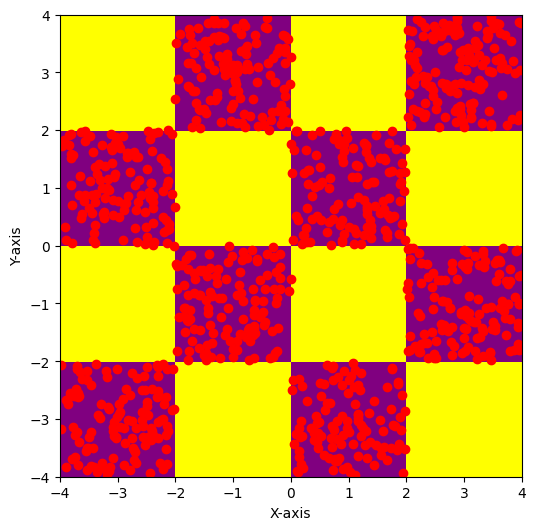

In [6]:
import tqdm
import math
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Parameters
N = 1000  # Number of points to sample
x_min, x_max = -4, 4
y_min, y_max = -4, 4
resolution = 100  # Resolution of the grid

# Create the grid
x = np.linspace(x_min, x_max, resolution)
y = np.linspace(y_min, y_max, resolution)
X, Y = np.meshgrid(x, y)

# Checkerboard pattern
length = 4
checkerboard = np.indices((length, length)).sum(axis=0) % 2

# Sample points in regions where checkerboard pattern is 1
sampled_points2 = []
while len(sampled_points2) < N:
    # Randomly sample a point within the x and y range
    x_sample = np.random.uniform(x_min, x_max)
    y_sample = np.random.uniform(y_min, y_max)
    
    # Determine the closest grid index
    i = int((x_sample - x_min) / (x_max - x_min) * length)
    j = int((y_sample - y_min) / (y_max - y_min) * length)
    
    # Check if the sampled point is in a region where checkerboard == 1
    if checkerboard[j, i] == 0:
        sampled_points2.append((x_sample, y_sample))

# Convert to NumPy array for easier plotting
sampled_points2 = np.array(sampled_points2)

# Plot the checkerboard pattern
plt.figure(figsize=(6, 6))
plt.imshow(checkerboard, extent=(x_min, x_max, y_min, y_max), origin="lower", cmap=ListedColormap(["purple", "yellow"]))

# Plot sampled points
plt.scatter(sampled_points2[:, 0], sampled_points2[:, 1], color="red", marker="o")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.596078431372549, 0.8745098039215686, 0.5411764705882353, 1.0), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0), (0.7803921568627451, 0.7803921568627451, 0.7803921568627451, 1.0)]
(1000, 2) (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
(1000, 2) (0.596078431372549, 0.8745098039215686, 0.5411764705882353, 1.0)
(1000, 2) (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0)
(1000, 2) (0.7803921568627451, 0.7803921568627451, 0.7803921568627451, 1.0)


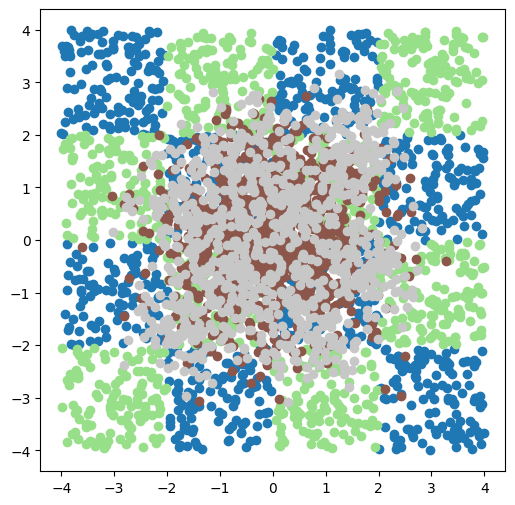

In [7]:
# t = 0.5
noise = np.random.randn(N, 2)

def sample_simplex(n):
    alpha = torch.ones(n) # uniform over simplex
    return np.random.dirichlet(alpha)

def interpolate_samples(t_weights, anchor_samples):
    interpolated = np.zeros_like(anchor_samples[0])
    for i, sample in enumerate(anchor_samples):
        interpolated += t_weights[i:i+1] * sample
    return interpolated

def get_n_colors(n, cmap_name="tab20"):
    cmap = plt.get_cmap(cmap_name)
    return [cmap(i/n) for i in range(n)]

distributions = [sampled_points, sampled_points2, noise]
print(sampled_points.shape)
print(sampled_points2.shape)
print(noise.shape)
t_sample = sample_simplex(len(distributions))
interpolated = interpolate_samples(t_sample, distributions)
print(interpolated.shape)
distributions.append(interpolated)
plt.figure(figsize=(6, 6))
colors = get_n_colors(len(distributions))
print(colors)
for distribution, color in zip(distributions, colors):
    print(distribution.shape, color)
    plt.scatter(distribution[:, 0], distribution[:, 1], color=color, marker="o")
# plt.scatter(noise[:, 0], noise[:, 1], color="blue", marker="o")
# plt.scatter((1 - t) * noise[:, 0] + t * sampled_points[:, 0], (1 - t) * noise[:, 1] + t * sampled_points[:, 1], color="green", marker="o")
plt.show()

In [21]:
interpolated

array([[ 0.32544244,  0.36875342],
       [-0.24317102, -1.84088428],
       [ 0.15982434,  1.68460906],
       ...,
       [-0.61623631,  0.39250669],
       [-0.21862984,  0.97603159],
       [ 2.17798576,  0.74753956]])

In [8]:
sum(t_sample)

0.9999999999999998

## Model

In [9]:
class Block(nn.Module):
    def __init__(self, channels=512):
        super().__init__()
        self.ff = nn.Linear(channels, channels)
        self.act = nn.ReLU()

    def forward(self, x):
        return self.act(self.ff(x))

class MLP(nn.Module):
    def __init__(self, channels_data=2, layers=5, channels=512, channels_t=512, t_dof=1):
        super().__init__()
        self.channels_t = channels_t * t_dof
        self.in_projection = nn.Linear(channels_data, channels)
        self.t_projection = nn.Linear(self.channels_t, channels)
        self.blocks = nn.Sequential(*[
            Block(channels) for _ in range(layers)
        ])
        self.out_projection = nn.Linear(channels, channels_data * t_dof)
        self.t_dof = t_dof
    # def gen_t_embedding(self, t, max_positions=10000):
    #     B = t.shape[0]
    #     t = t * max_positions
    #     half_dim = self.channels_t // 2
    #     emb = math.log(max_positions) / (half_dim - 1)
    #     emb = torch.arange(half_dim, device=t.device).float().mul(-emb).exp()
    #     emb = t[:, None] * emb[None, :]
    #     emb = torch.cat([emb.sin(), emb.cos()], dim=1)
    #     if self.channels_t % 2 == 1:  # zero pad
    #         emb = nn.functional.pad(emb, (0, 1), mode='constant')
    #     return emb.view(B, -1)

    def forward(self, x, t):
        B, C = x.shape
        # print("x", x.shape)
        # print("t", t.shape)
        x = self.in_projection(x)
        # print("x proj", x.shape)
        t = gen_t_embedding(t)
        # print("t emb", t.shape)
        t = self.t_projection(t)
        # print("t proj", t.shape)
        x = x + t
        x = self.blocks(x)
        # print("x block", x.shape)
        x = self.out_projection(x)
        # print("x out proj", x.shape)
        return x.view(B, C, self.t_dof)

def gen_t_embedding(t, channels_t=512, max_positions=10000):
    B = t.shape[0]
    t = t * max_positions
    # print(t)
    half_dim = channels_t // 2
    # print(half_dim)
    emb = math.log(max_positions) / (half_dim - 1)
    # print("math", emb)
    emb = torch.arange(half_dim, device=t.device).float().mul(-emb).exp()
    # print("arange", emb.shape, emb.min(), emb.max())
    emb = t[..., None] * emb[None, None, :]
    emb = torch.cat([emb.sin(), emb.cos()], dim=-1)
    # print(emb.shape)
    if channels_t % 2 == 1:  # zero pad
        emb = nn.functional.pad(emb, (0, 1), mode='constant')
    # print(emb.min(), emb.max(), emb.shape)
    return emb.view(B, -1)

# def positional_encoding(t, num_freqs=6):
#     B, dim = t.shape
#     freq_bands = 2.0 ** torch.arange(num_freqs).float() * math.pi
#     # expand dimensions
#     t= t.unsqueeze(-1)
#     freqs = freq_bands.view(1, 1, -1)

#     # compute sin and cos
#     sin_enc = torch.sin(t * freqs)
#     cos_enc = torch.cos(t * freqs)
#     # concatenate sin and cos along last dimension, then flatten
#     pe = torch.cat([sin_enc, cos_enc], dim=-1)
#     print(pe.min(), pe.max())
#     return pe

In [98]:
gen_t_embedding(torch.rand(2, 2), max_positions=2).shape

arange torch.Size([256]) tensor(0.5000) tensor(1.)
torch.Size([2, 2, 512])
tensor(0.1642) tensor(0.9864) torch.Size([2, 2, 512])


torch.Size([2, 1024])

In [61]:
embedding = positional_encoding(torch.rand(2, 1), num_freqs=256)
embedding.shape

tensor(nan) tensor(nan)


torch.Size([2, 1, 512])

In [11]:
model = MLP(layers=5, channels=512, t_dof=2)
optim = torch.optim.AdamW(model.parameters(), lr=1e-4)

### Load Pretrained Model for 500k Steps

In [ ]:
# If you don't want to train yourself, just load a pretrained model which trained for 500k steps. 
ckpt = torch.load("models/model_500k.pt")
model.load_state_dict(ckpt)

/tmp/ipykernel_3775816/3901524815.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("models/model_500k.pt")


<All keys matched successfully>

## Training

In [ ]:
def sample_simplex_batch(n, b, alpha_factor=1.):
    alpha = torch.ones(n) * alpha_factor
    return torch.distributions.Dirichlet(alpha).sample((b,))

def interpolate_samples(t_samples, anchor_samples):
    B, N = t_samples.shape
    D = anchor_samples[0].shape[-1]
    interpolated = torch.zeros(B, D)
    for i, sample in enumerate(anchor_samples):
        if sample.dim() == 1:
            sample = sample.unsqueeze(0).expand(B, -1)
        interpolated += t_samples[:, i:i+1] * sample
    return interpolated
data = torch.Tensor(sampled_points)
data2 = torch.Tensor(sampled_points2)
training_steps = 100_000
batch_size = 64
pbar = tqdm.tqdm(range(training_steps))
losses = []
t_dof = 2

for i in pbar:
    x1 = data[torch.randint(data.size(0), (batch_size,))]
    x2 = data2[torch.randint(data2.size(0), (batch_size,))]
    x0 = torch.randn_like(x1) 
    # target = x1 - x0
    # t = torch.rand(x1.size(0))
    t = sample_simplex_batch(t_dof+1, batch_size, alpha_factor=0.3)
    t[:, 2] = 1 - t[:, 0] - t[:, 1] # making sure it adds to 1.
    # xt = (1 - t[:, None]) * x0 + t[:, None] * x1
    xt = interpolate_samples(t, [x1, x2, x0])
    pred = model(xt, t[..., :t_dof])  # also add t here
    # print("pred", pred.shape)
    target = torch.stack([x1 - x0, x2 - x0], dim=1)
    # print("target", target.shape)
    loss = ((target - pred)**2).mean()
    loss.backward()
    optim.step()
    optim.zero_grad()
    pbar.set_postfix(loss=loss.item())
    losses.append(loss.item())

  4%|▍         | 4302/100000 [00:44<14:53, 107.13it/s, loss=4.42]

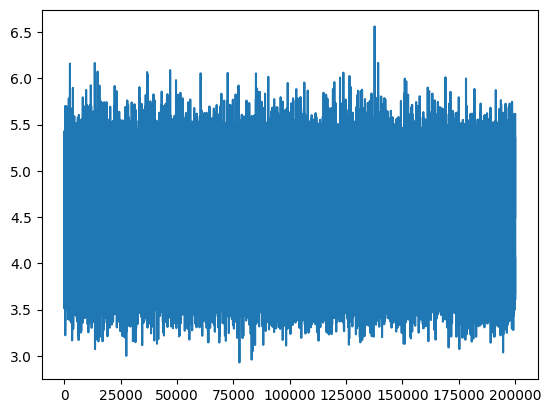

In [ ]:
plt.plot(losses)

In [ ]:
torch.save(model.state_dict(), "models/model_2d_100k_alpha0.3.pt")

## Sampling

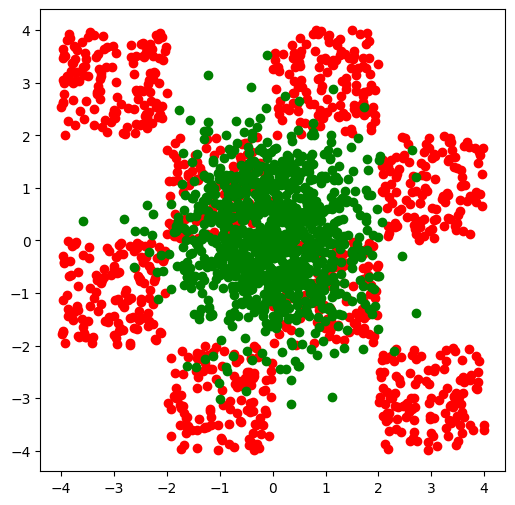

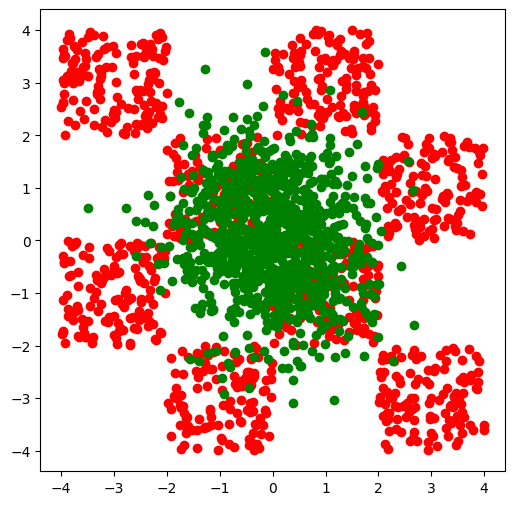

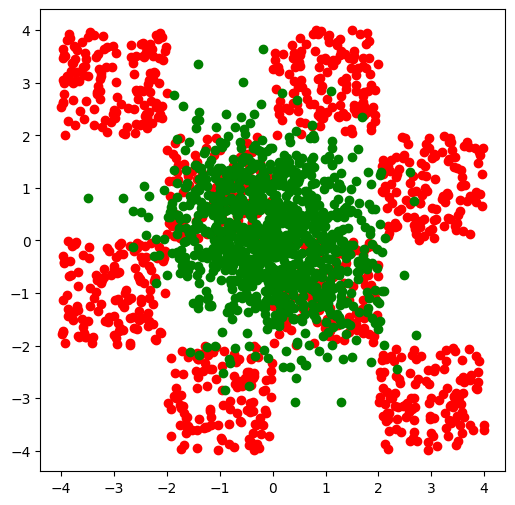

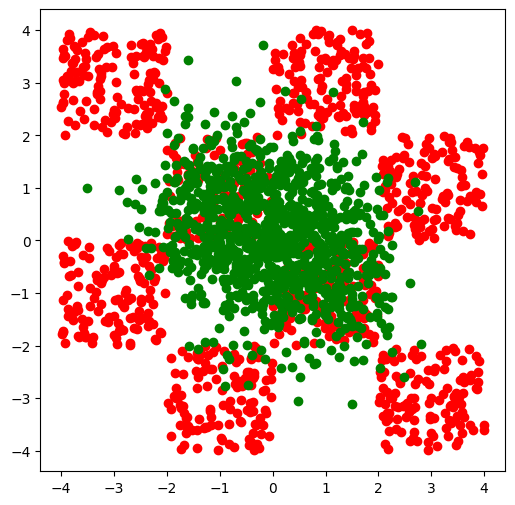

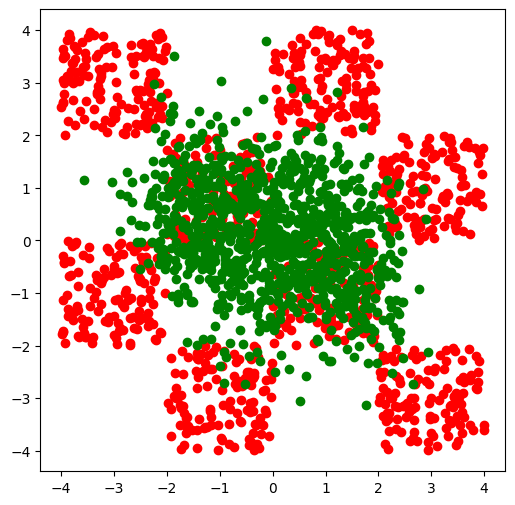

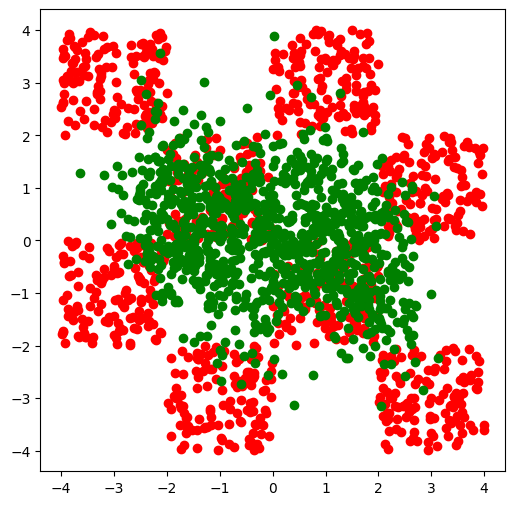

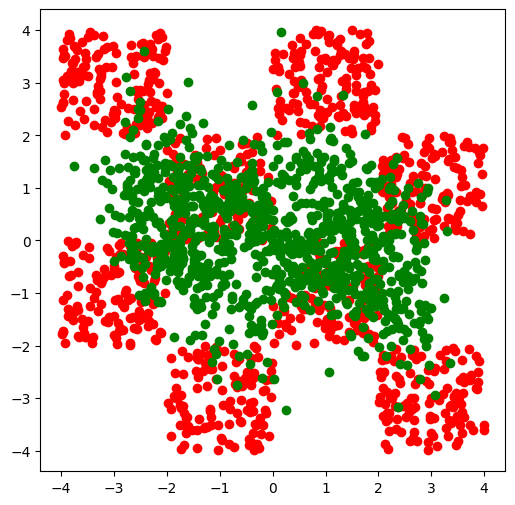

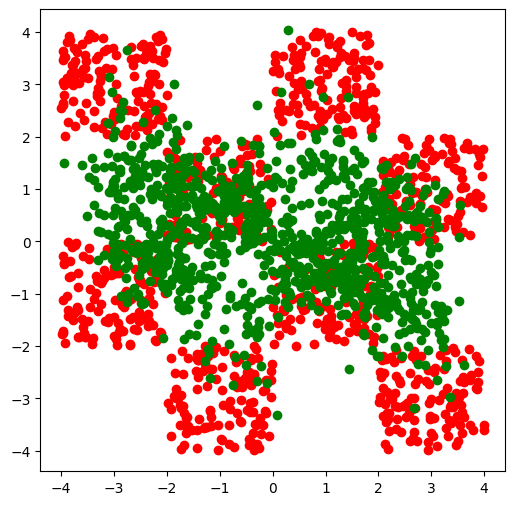

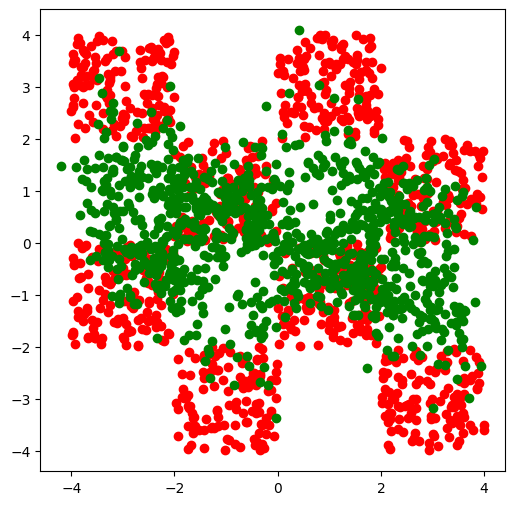

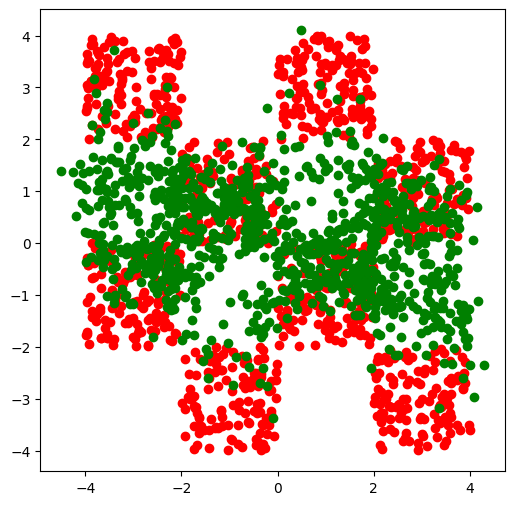

Done Sampling


In [ ]:
torch.manual_seed(42)
model.eval().requires_grad_(False)
xt = torch.randn(1000, 2)
steps = 1000
plot_every = 100
for i, t in enumerate(torch.linspace(0, 1, steps), start=1):
    t_samples = torch.stack([t.expand(xt.size(0)), torch.zeros(xt.size(0))], dim=-1)
    # print(t_samples.shape)
    # approaching the first distribution.
    pred = model(xt, t_samples)
    xt = xt + (1 / steps) * pred[:, :, 0]
    if i % plot_every == 0:
        plt.figure(figsize=(6, 6))
        plt.scatter(sampled_points[:, 0], sampled_points[:, 1], color="red", marker="o")
        plt.scatter(xt[:, 0], xt[:, 1], color="green", marker="o")
        plt.show()
model.train().requires_grad_(True)
print("Done Sampling")

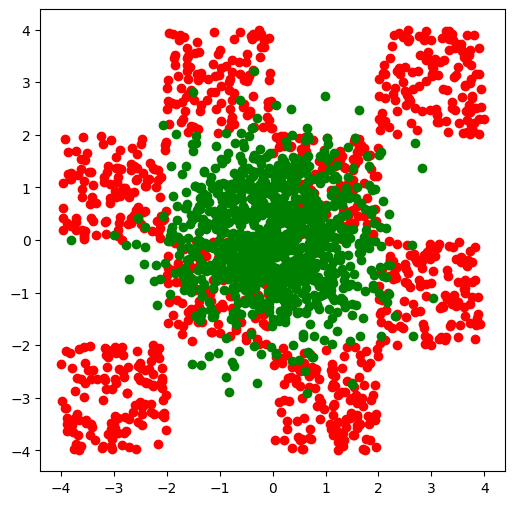

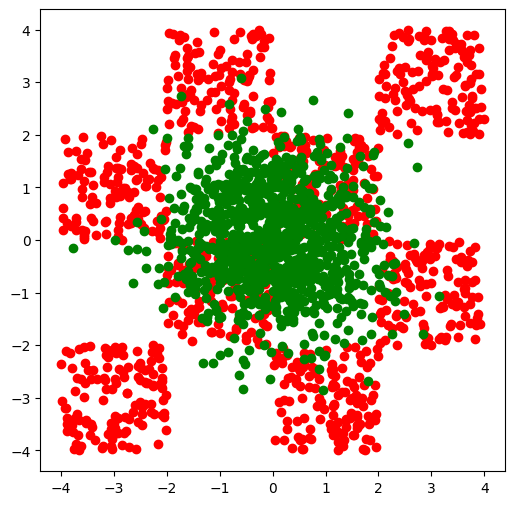

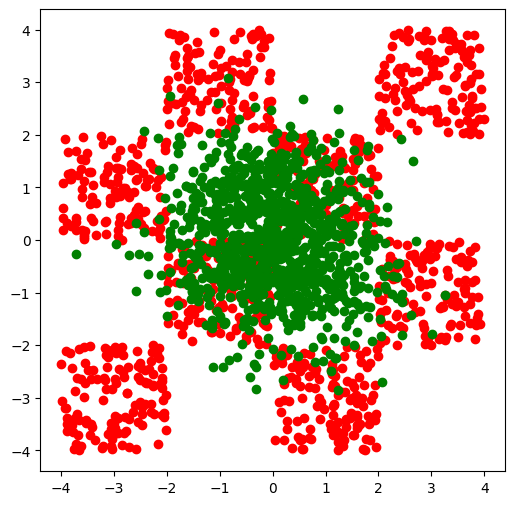

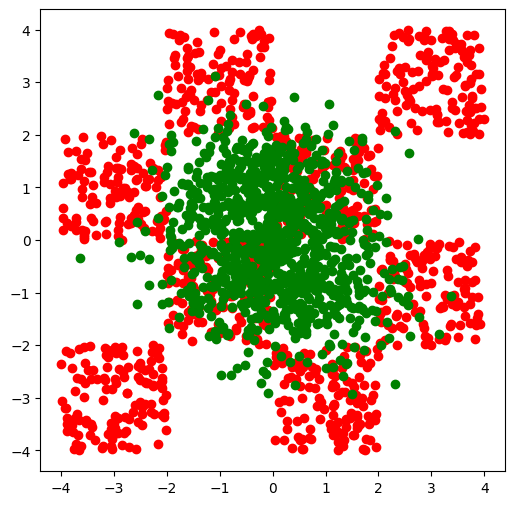

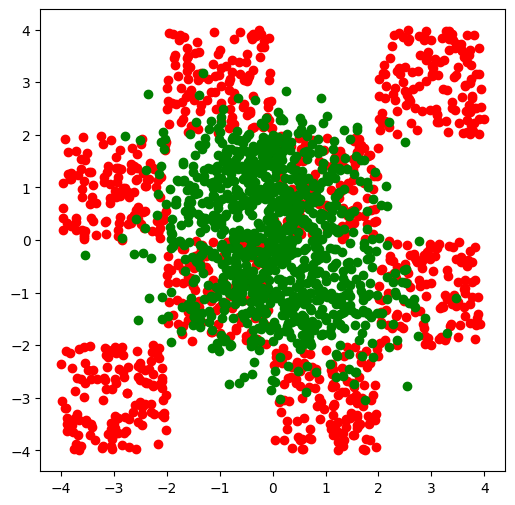

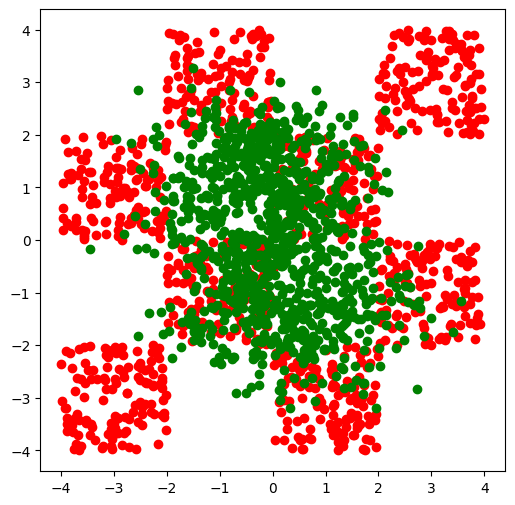

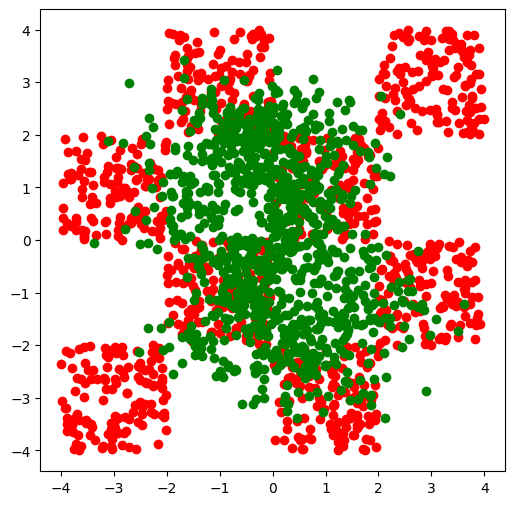

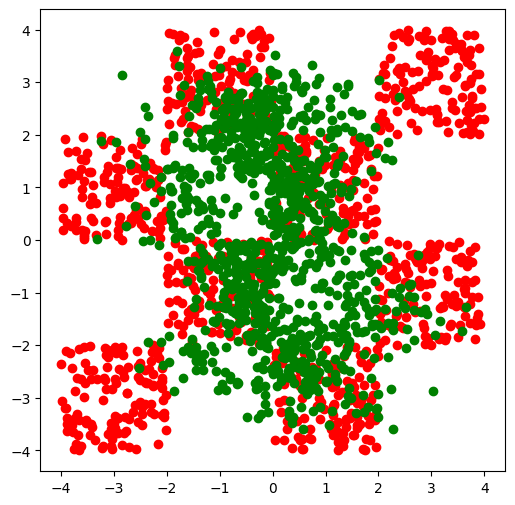

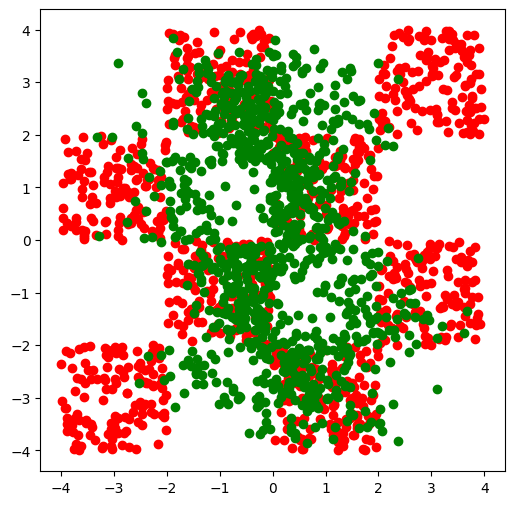

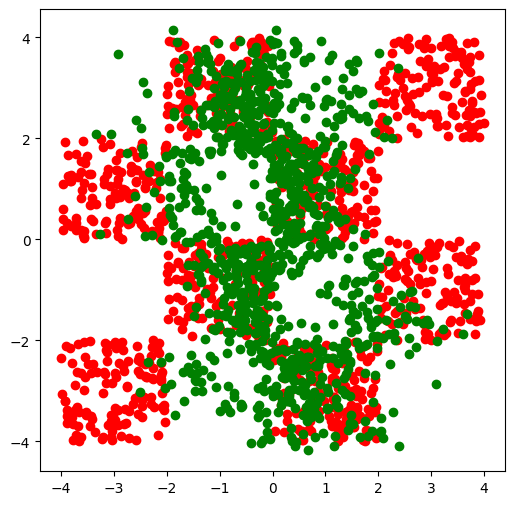

Done Sampling


In [ ]:
torch.manual_seed(42)
model.eval().requires_grad_(False)
xt = torch.randn(1000, 2)
steps = 1000
plot_every = 100
for i, t in enumerate(torch.linspace(0, 1, steps), start=1):
    t_samples = torch.stack([torch.zeros(xt.size(0)), t.expand(xt.size(0))], dim=-1)
    # print(t_samples.shape)
    # approaching the first distribution.
    pred = model(xt, t_samples)
    xt = xt + (1 / steps) * pred[:, :, 1]
    if i % plot_every == 0:
        plt.figure(figsize=(6, 6))
        plt.scatter(sampled_points2[:, 0], sampled_points2[:, 1], color="red", marker="o")
        plt.scatter(xt[:, 0], xt[:, 1], color="green", marker="o")
        plt.show()
model.train().requires_grad_(True)
print("Done Sampling")

torch.Size([1000, 2])
1000


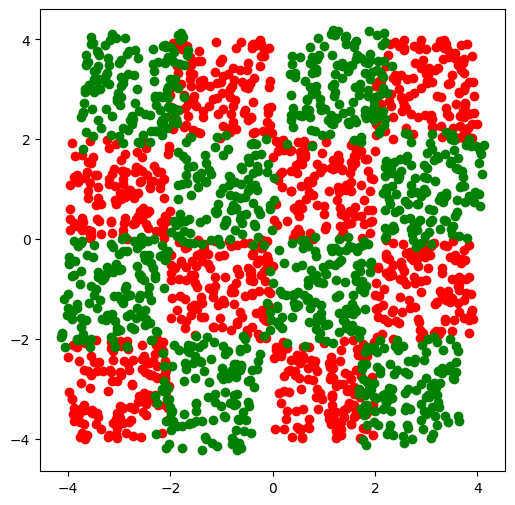

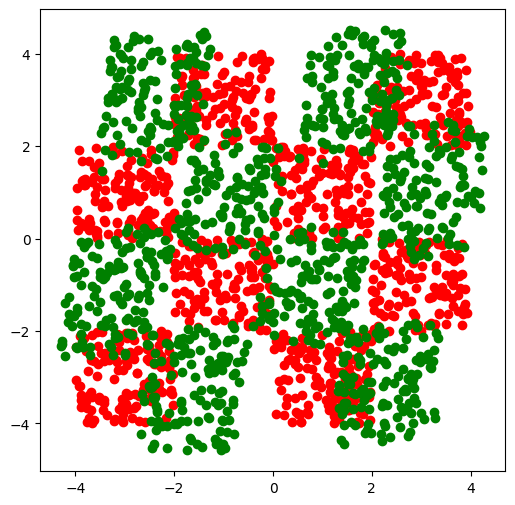

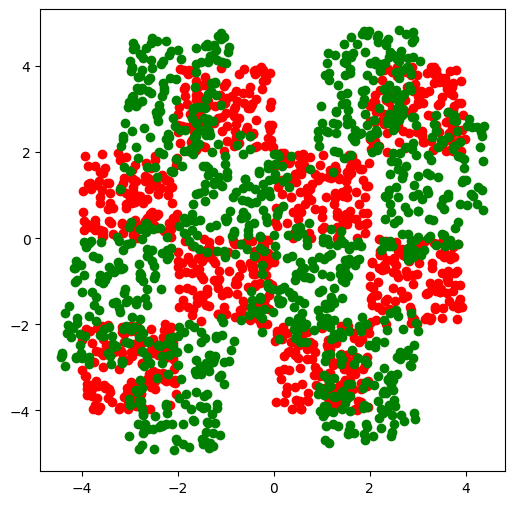

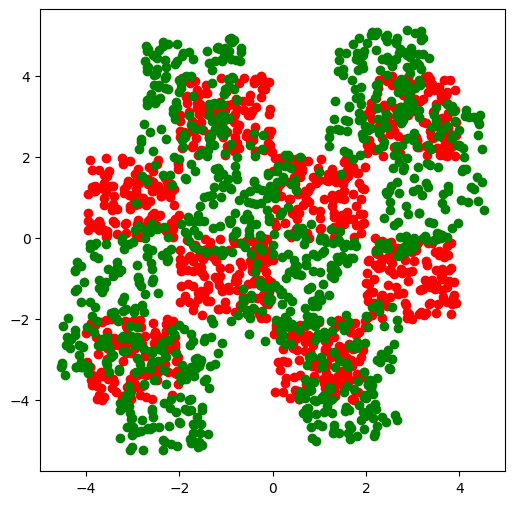

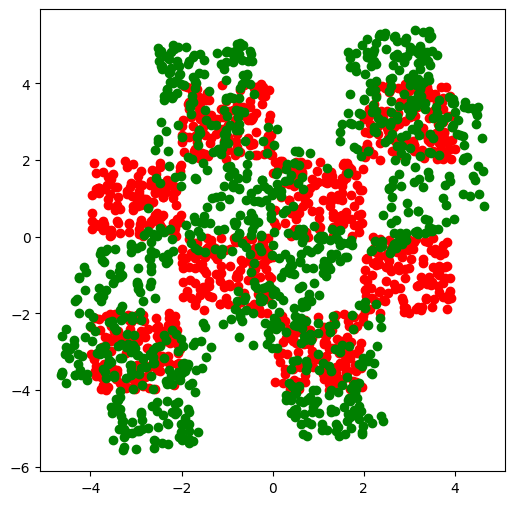

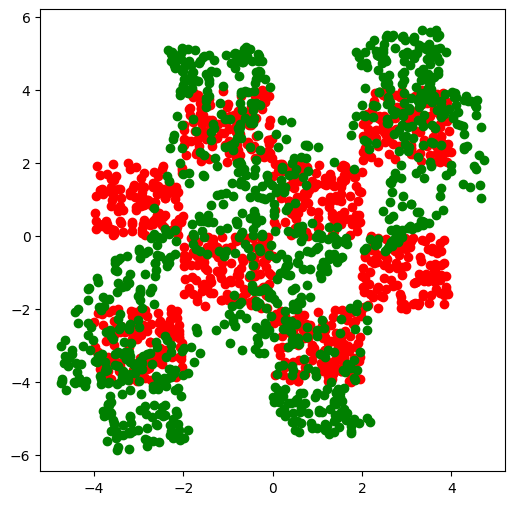

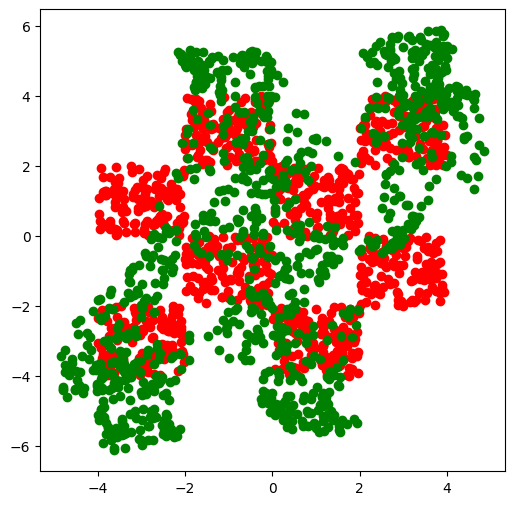

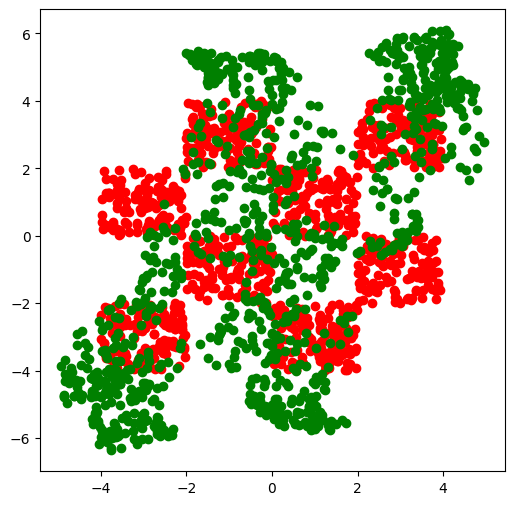

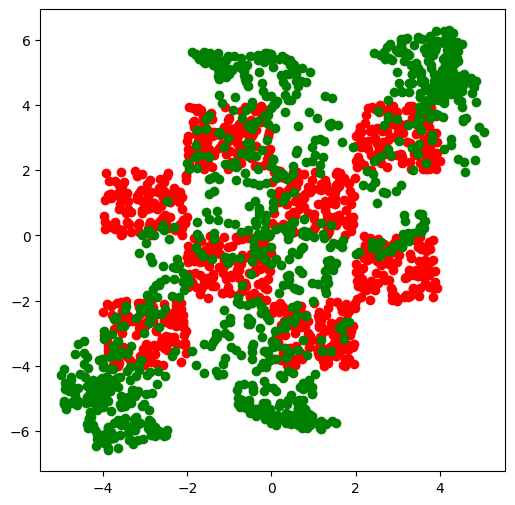

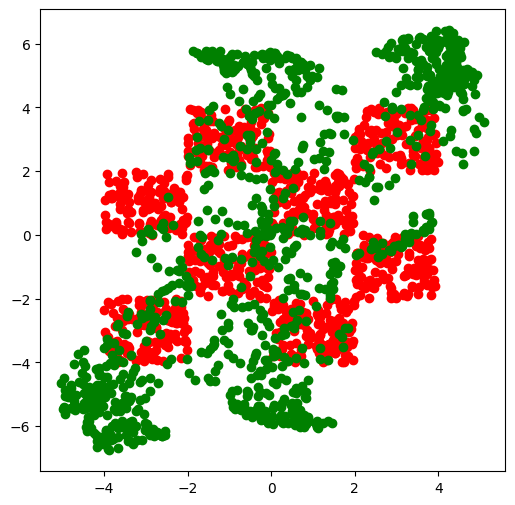

Done Sampling


In [ ]:
torch.manual_seed(42)
model.eval().requires_grad_(False)
# xt = torch.randn(1000, 2)
xt = torch.Tensor(sampled_points)
print(xt.shape)
b = xt.shape[0]
print(b)
steps = 1000
plot_every = 100
for i, t in enumerate(torch.linspace(0, 1, steps), start=1):
    t_2 = torch.ones(b) * t
    t_samples = torch.stack([torch.ones(b) - t_2, t_2], dim=-1)
    # print(t_samples.shape)
    # approaching the first distribution.
    pred = model(xt, t_samples)
    xt = xt + (1 / steps) * pred[:, :, 1]
    if i % plot_every == 0:
        plt.figure(figsize=(6, 6))
        plt.scatter(sampled_points2[:, 0], sampled_points2[:, 1], color="red", marker="o")
        plt.scatter(xt[:, 0], xt[:, 1], color="green", marker="o")
        plt.show()
model.train().requires_grad_(True)
print("Done Sampling")
